In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [22]:
# set up the parameters of the class-conditioned Gaussian pdfs
mu_0 = np.array([-1, 1, -1, 1])
mu_1 = np.array([1, 1, 1, 1])

sigma_0 = np.array([[2, -0.5, 0.3, 0],
                    [-0.5, 1, -0.5, 0],
                    [0.3, -0.5, 1, 0],
                    [0, 0, 0, 2]])
sigma_1 = np.array([[1, 0.3, -0.2, 0],
                    [0.3, 2, 0.3, 0],
                    [-0.2, 0.3, 1, 0],
                    [0, 0, 0, 3]])

# set up the parameters of the class priors
p_0 = 0.7
p_1 = 0.3

In [40]:
# generate 10000 samples according to the data distribution
samples = 10000
x = np.random.multivariate_normal(mu_0, sigma_0, samples)
y = np.random.multivariate_normal(mu_1, sigma_1, samples)

# separate our final data set into data and labels
data = []
labels = []

# use the class priors to generate the labels
for i in range(samples):
    if np.random.rand() < p_0:
        data.append(x[i])
        labels.append(0)
    else:
        data.append(y[i])
        labels.append(1)

# convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [62]:
# set up the parameters of the loss matrix, using 0-1 loss
loss_matrix = np.array([[0, 1], [1, 0]])

In [4]:
# part a
# 1.
# specify the minimum expected risk classification rule in the form of a likelihood ratio test
# where the threshold is a function of class priors and fixed loss values for each of the four possible outcomes

In [69]:
# return the ratio f_{X|Y}(x|1) / f_{X|Y}(x|0)
def likelihood_ratio_test(x: np.array, mu_0: np.array, mu_1: np.array, sigma_0: np.array, sigma_1: np.array) -> float:
    """
    Given a sample x, return the ratio f_{X|Y}(x|1) / f_{X|Y}(x|0)

    Args:
        x (np.array): a sample from the data distribution
        mu_0 (np.array): the mean of the class 0 Gaussian pdf
        mu_1 (np.array): the mean of the class 1 Gaussian pdf
        sigma_0 (np.array): the covariance matrix of the class 0 Gaussian pdf
        sigma_1 (np.array): the covariance matrix of the class 1 Gaussian pdf

    Returns:
        float: the ratio f_{X|Y}(x|1) / f_{X|Y}(x|0)
    """
    ratio_x_0 = multivariate_normal.pdf(x, mean=mu_0, cov=sigma_0)
    ratio_x_1 = multivariate_normal.pdf(x, mean=mu_1, cov=sigma_1)
    return ratio_x_1 / ratio_x_0

In [70]:
# define the minimum expected risk classification rule
def minimum_expected_risk_classification_rule(x: np.array, threshold: float, mu_0: np.array, mu_1: np.array, sigma_0: np.array, sigma_1: np.array) -> int:
    """
    Given a sample x and a threshold, return the classification of x according to the minimum expected risk classification rule

    Args:
        x (np.array): a sample from the data distribution
        mu_0 (np.array): the mean of the class 0 Gaussian pdf
        mu_1 (np.array): the mean of the class 1 Gaussian pdf
        sigma_0 (np.array): the covariance matrix of the class 0 Gaussian pdf
        sigma_1 (np.array): the covariance matrix of the class 1 Gaussian pdf
        threshold (float): the threshold for the likelihood ratio test

    Returns:
        int: the classification of x according to the minimum expected risk classification rule. 0 for class 0, 1 for class 1
    """
    if likelihood_ratio_test(x, mu_0, mu_1, sigma_0, sigma_1) >= threshold:
        return 1
    else:
        return 0

In [7]:
# 2.
# implement the classifier and apply it to the data set
# vary the threshold gradually from 0 to infinity and for each value of the threshold, compute the true positive rate and the false positive probabilities
# using these paired values, plot the ROC curve

In [71]:
# obtain the true positive rate and false positive rate for each threshold for the ROC curve
def ROC_curve(data: np.array, labels: np.array, threshold: float, mu_0: np.array = mu_0, mu_1: np.array = mu_1, sigma_0: np.array = sigma_0, sigma_1: np.array = sigma_1) -> tuple[float, float]:
    """
    Given data, labels, and a threshold, return the true positive rate and false positive rate for the ROC curve

    Args:
        data (np.array): the data set
        labels (np.array): the labels for the data set
        threshold (float): the threshold for the likelihood ratio test
        mu_0 (np.array, optional): the mean of the class 0 Gaussian pdf. Defaults to mu_0.
        mu_1 (np.array, optional): the mean of the class 1 Gaussian pdf. Defaults to mu_1.
        sigma_0 (np.array, optional): the covariance matrix of the class 0 Gaussian pdf. Defaults to sigma_0.
        sigma_1 (np.array, optional): the covariance matrix of the class 1 Gaussian pdf. Defaults to sigma_1.

    Returns:
        tuple[float, float]: the true positive rate and false positive rate for the ROC curve
    """
    # initialize counters
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    # loop through data and labels
    for i in range(len(data)):
        if labels[i] == 1:
            if minimum_expected_risk_classification_rule(data[i], threshold, mu_0, mu_1, sigma_0, sigma_1) == 1:
                true_positive += 1
            else:
                false_negative += 1
        else:
            if minimum_expected_risk_classification_rule(data[i], threshold, mu_0, mu_1, sigma_0, sigma_1) == 1:
                false_positive += 1
            else:
                true_negative += 1
    
    # get the number of total positives
    total_positives = np.sum(labels)

    # compute the rates
    true_positive_rate = true_positive / total_positives
    false_positive_rate = false_positive / (false_positive + true_negative)

    # print the threshold and rates
    print(f"threshold: {threshold}, true positive rate: {true_positive_rate}, false positive rate: {false_positive_rate}")
    
    return true_positive_rate, false_positive_rate


In [87]:
# have some constants for the ROC curve loop
thresholds = np.linspace(0, 100, 100, endpoint=False)

threshold: 0.0, true positive rate: 1.0, false positive rate: 1.0
threshold: 1.0, true positive rate: 0.922971114167813, false positive rate: 0.10575296108291032
threshold: 2.0, true positive rate: 0.8638239339752407, false positive rate: 0.06204173716864072
threshold: 3.0, true positive rate: 0.8108665749656121, false positive rate: 0.04258319232938522
threshold: 4.0, true positive rate: 0.765818431911967, false positive rate: 0.02961082910321489
threshold: 5.0, true positive rate: 0.7321182943603851, false positive rate: 0.022701635645798083
threshold: 6.0, true positive rate: 0.7097661623108665, false positive rate: 0.01847151720248167
threshold: 7.0, true positive rate: 0.6846629986244842, false positive rate: 0.015228426395939087
threshold: 8.0, true positive rate: 0.6640302613480055, false positive rate: 0.012549351381838691
threshold: 9.0, true positive rate: 0.6464924346629987, false positive rate: 0.01071630005640158
threshold: 10.0, true positive rate: 0.6289546079779917, fal

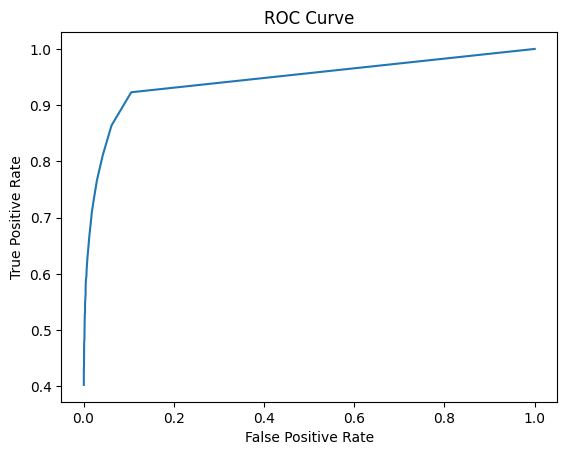

In [88]:
# Plot the ROC curve
true_positive_rate = []
false_positive_rate = []
for threshold in thresholds:
    roc = ROC_curve(data, labels, threshold)
    true_positive_rate.append(roc[0])
    false_positive_rate.append(roc[1])
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [10]:
# 3.
# determine the threshold that minimizes the probability of error
# on the ROC curve, superimpose the true positive and false positive probabilities for this minimum-P(error) threshold
# calculate and report an estimate of the minimum probability of error achievable for this data distribution


In [73]:
# obtain the probability of error for each threshold that is only based on the data and not priors
def probability_of_error(data: np.array, labels: np.array, threshold: float, mu_0: np.array = mu_0, mu_1: np.array = mu_1, sigma_0: np.array = sigma_0, sigma_1: np.array = sigma_1) -> float:
    """
    Given data, labels, and a threshold, return the probability of error

    Args:
        data (np.array): the data set
        labels (np.array): the labels for the data set
        threshold (float): the threshold for the likelihood ratio test
        mu_0 (np.array, optional): the mean of the class 0 Gaussian pdf. Defaults to mu_0.
        mu_1 (np.array, optional): the mean of the class 1 Gaussian pdf. Defaults to mu_1.
        sigma_0 (np.array, optional): the covariance matrix of the class 0 Gaussian pdf. Defaults to sigma_0.
        sigma_1 (np.array, optional): the covariance matrix of the class 1 Gaussian pdf. Defaults to sigma_1.

    Returns:
        float: the probability of error
    """
    # initialize error counter
    error = 0

    # loop through data and labels
    for i in range(len(data)):
        if labels[i] == 1 and minimum_expected_risk_classification_rule(data[i], threshold, mu_0, mu_1, sigma_0, sigma_1) == 0:
            error += 1
        elif labels[i] == 0 and minimum_expected_risk_classification_rule(data[i], threshold, mu_0, mu_1, sigma_0, sigma_1) == 1:
            error += 1
    
    # compute the probability of error
    p_error = error / len(data)
    
    # print the threshold and probability of error
    print(f"threshold: {threshold}, probability of error: {p_error}")
    
    # return the probability of error
    return p_error


threshold: 0.0, probability of error: 0.7092
threshold: 11.11111111111111, probability of error: 0.1176
threshold: 22.22222222222222, probability of error: 0.1347
threshold: 33.33333333333333, probability of error: 0.1467
threshold: 44.44444444444444, probability of error: 0.155
threshold: 55.55555555555556, probability of error: 0.1608
threshold: 66.66666666666666, probability of error: 0.1649
threshold: 77.77777777777777, probability of error: 0.1686
threshold: 88.88888888888889, probability of error: 0.1716
threshold: 100.0, probability of error: 0.1745


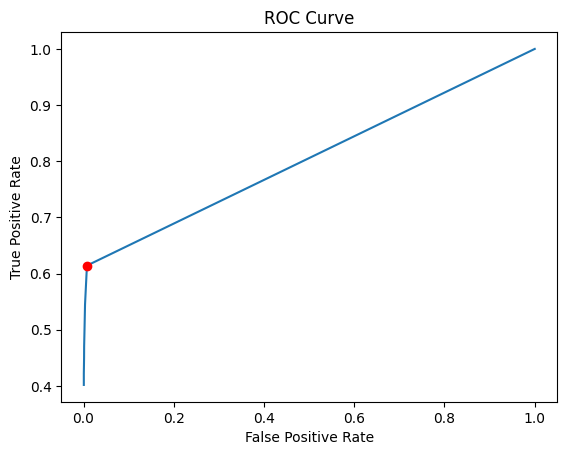

In [74]:
# plot the minimum-P(error) threshold
min_error_threshold = 0
min_error = 1

for threshold in thresholds:
    error = probability_of_error(data, labels, threshold)
    if error < min_error:
        min_error = error
        min_error_threshold = threshold
        
# plot the ROC curve (previously determined) with the minimum-P(error) threshold
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate[np.where(thresholds == min_error_threshold)[0][0]], true_positive_rate[np.where(thresholds == min_error_threshold)[0][0]], 'ro')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [75]:
# P(error; threshold) = P(D=1|Y=0)P(Y=0) + P(D=0|Y=1)P(Y=1)
def probability_of_error_optimal(data: np.array, labels: np.array, threshold: float, mu_0: np.array = mu_0, mu_1: np.array = mu_1, sigma_0: np.array = sigma_0, sigma_1: np.array = sigma_1) -> float:
    """
    Given data, labels, and a threshold, return the probability of error taking into account
    the priors and loss matrix

    Args:
        data (np.array): the data set
        labels (np.array): the labels for the data set
        threshold (float): the threshold for the likelihood ratio test
        mu_0 (np.array, optional): the mean of the class 0 Gaussian pdf. Defaults to mu_0.
        mu_1 (np.array, optional): the mean of the class 1 Gaussian pdf. Defaults to mu_1.
        sigma_0 (np.array, optional): the covariance matrix of the class 0 Gaussian pdf. Defaults to sigma_0.
        sigma_1 (np.array, optional): the covariance matrix of the class 1 Gaussian pdf. Defaults to sigma_1.

    Returns:
        float: the probability of error taking into account the priors and loss matrix
    """
    # initialize error counter
    error_0 = 0
    error_1 = 0

    # loop through data and labels
    for i in range(len(data)):
        if labels[i] == 1 and minimum_expected_risk_classification_rule(data[i], threshold, mu_0, mu_1, sigma_0, sigma_1) == 0:
            error_1 += 1
        elif labels[i] == 0 and minimum_expected_risk_classification_rule(data[i], threshold, mu_0, mu_1, sigma_0, sigma_1) == 1:
            error_0 += 1

    # compute the probability of error
    p_error_0 = error_0 / len(data)
    p_error_1 = error_1 / len(data)

    # compute the probability of error taking into account the priors and loss matrix
    p_error = p_error_0 * p_0 * loss_matrix[0][1] + p_error_1 * p_1 * loss_matrix[1][0]
    
    # print the threshold and probability of error
    print(f"threshold: {threshold}, probability of error with priors and loss matrix: {p_error}")
    
    # return the probability of error
    return p_error

In [76]:
# determine the theoretical optimal threshold from priors and loss values
min_error_optimal_threshold = 0
min_error_optimal = 1

for threshold in thresholds:
    error = probability_of_error_optimal(data, labels, threshold)
    if error < min_error_optimal:
        min_error_optimal = error
        min_error_optimal_threshold = threshold

threshold: 0.0, probability of error with priors and loss matrix: 0.49644
threshold: 11.11111111111111, probability of error with priors and loss matrix: 0.037439999999999994
threshold: 22.22222222222222, probability of error with priors and loss matrix: 0.04137
threshold: 33.33333333333333, probability of error with priors and loss matrix: 0.04465
threshold: 44.44444444444444, probability of error with priors and loss matrix: 0.0469
threshold: 55.55555555555556, probability of error with priors and loss matrix: 0.04859999999999999
threshold: 66.66666666666666, probability of error with priors and loss matrix: 0.04975
threshold: 77.77777777777777, probability of error with priors and loss matrix: 0.05078
threshold: 88.88888888888889, probability of error with priors and loss matrix: 0.051680000000000004
threshold: 100.0, probability of error with priors and loss matrix: 0.05255


In [84]:
# print the estimated minimum probability of error
print("The estimated minimum probability of error is: ", min_error_optimal)
# print the empirical selected threshold
print("The empirical selected threshold is: ", min_error_threshold)
# print the theoretical optimal threshold
print("The theoretical optimal threshold is: ", min_error_optimal_threshold)

The estimated minimum probability of error is:  0.037439999999999994
The empirical selected threshold is:  11.11111111111111
The theoretical optimal threshold is:  11.11111111111111


In [ ]:
# part b
# ERM classification using incorrect knowledge of data distribution
# assume we know the true class priors, but the class conditional pdfs are both gaussian with true means
# but the covariance matrices are diagonal (with diagonal entries equal to true variances, but the off-diagonal entries are zero)
# analyze the impact of this model mismatch by implementing the ERM classification rule using the incorrect model
# repeat the same steps in part a on the same data set

In [67]:
# set up the diagonal covariance matrices
sigma_0_incorrect = np.array([[2, 0, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 2]])
sigma_1_incorrect = np.array([[1, 0, 0, 0],
                              [0, 2, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 3]])

threshold: 0.0, true positive rate: 1.0, false positive rate: 1.0
threshold: 11.11111111111111, true positive rate: 0.6506189821182944, false positive rate: 0.025380710659898477
threshold: 22.22222222222222, true positive rate: 0.5257909215955984, false positive rate: 0.01311336717428088
threshold: 33.33333333333333, true positive rate: 0.4442916093535076, false positive rate: 0.009447264523406655
threshold: 44.44444444444444, true positive rate: 0.39270976616231085, false positive rate: 0.00775521714608009
threshold: 55.55555555555556, true positive rate: 0.35488308115543327, false positive rate: 0.005922165820642978
threshold: 66.66666666666666, true positive rate: 0.3263411279229711, false positive rate: 0.005076142131979695
threshold: 77.77777777777777, true positive rate: 0.2995185694635488, false positive rate: 0.00437112239142696
threshold: 88.88888888888889, true positive rate: 0.28026134800550206, false positive rate: 0.0038071065989847717
threshold: 100.0, true positive rate:

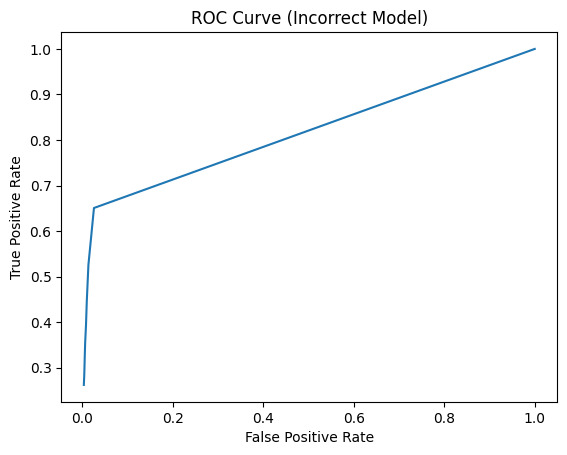

In [79]:
# Plot the ROC curve for the incorrect model
true_positive_rate_incorrect = []
false_positive_rate_incorrect = []
for threshold in thresholds:
    roc = ROC_curve(data, labels, threshold, mu_0, mu_1, sigma_0_incorrect, sigma_1_incorrect)
    true_positive_rate_incorrect.append(roc[0])
    false_positive_rate_incorrect.append(roc[1])
plt.plot(false_positive_rate_incorrect, true_positive_rate_incorrect)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Incorrect Model)')
plt.show()

threshold: 0.0, probability of error: 0.7092
threshold: 11.11111111111111, probability of error: 0.1196
threshold: 22.22222222222222, probability of error: 0.1472
threshold: 33.33333333333333, probability of error: 0.1683
threshold: 44.44444444444444, probability of error: 0.1821
threshold: 55.55555555555556, probability of error: 0.1918
threshold: 66.66666666666666, probability of error: 0.1995
threshold: 77.77777777777777, probability of error: 0.2068
threshold: 88.88888888888889, probability of error: 0.212
threshold: 100.0, probability of error: 0.2167


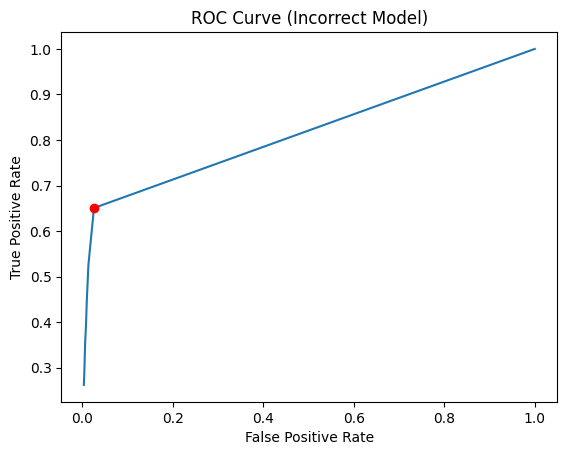

In [80]:
# plot the minimum-P(error) threshold for the incorrect model
min_error_threshold_incorrect = 0
min_error_incorrect = 1

for threshold in thresholds:
    error = probability_of_error(data, labels, threshold, mu_0, mu_1, sigma_0_incorrect, sigma_1_incorrect)
    if error < min_error_incorrect:
        min_error_incorrect = error
        min_error_threshold_incorrect = threshold
        
# plot the ROC curve (previously determined) with the minimum-P(error) threshold
plt.plot(false_positive_rate_incorrect, true_positive_rate_incorrect)
plt.plot(false_positive_rate_incorrect[np.where(thresholds == min_error_threshold_incorrect)[0][0]], true_positive_rate_incorrect[np.where(thresholds == min_error_threshold_incorrect)[0][0]], 'ro')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Incorrect Model)')
plt.show()

In [81]:
# determine the theoretical optimal threshold from priors and loss values for the incorrect model
min_error_optimal_threshold_incorrect = 0
min_error_optimal_incorrect = 1

for threshold in thresholds:
    error = probability_of_error_optimal(data, labels, threshold, mu_0, mu_1, sigma_0_incorrect, sigma_1_incorrect)
    if error < min_error_optimal_incorrect:
        min_error_optimal_incorrect = error
        min_error_optimal_threshold_incorrect = threshold

threshold: 0.0, probability of error with priors and loss matrix: 0.49644
threshold: 11.11111111111111, probability of error with priors and loss matrix: 0.04307999999999999
threshold: 22.22222222222222, probability of error with priors and loss matrix: 0.04788
threshold: 33.33333333333333, probability of error with priors and loss matrix: 0.053169999999999995
threshold: 44.44444444444444, probability of error with priors and loss matrix: 0.05683
threshold: 55.55555555555556, probability of error with priors and loss matrix: 0.059219999999999995
threshold: 66.66666666666666, probability of error with priors and loss matrix: 0.06129
threshold: 77.77777777777777, probability of error with priors and loss matrix: 0.06328
threshold: 88.88888888888889, probability of error with priors and loss matrix: 0.06468
threshold: 100.0, probability of error with priors and loss matrix: 0.06585


In [83]:
# print the estimated minimum probability of error for the incorrect model
print("The estimated minimum probability of error with the incorrect model is: ", min_error_optimal_incorrect)
# print the empirical selected threshold for the incorrect model
print("The empirical selected threshold with the incorrect model is: ", min_error_threshold_incorrect)
# print the theoretical optimal threshold for the incorrect model
print("The theoretical optimal threshold with the incorrect model is: ", min_error_optimal_threshold_incorrect)

The estimated minimum probability of error with the incorrect model is:  0.04307999999999999
The empirical selected threshold with the incorrect model is:  11.11111111111111
The theoretical optimal threshold with the incorrect model is:  11.11111111111111


# TODO: create a singular classifier function that iterates through the data and applies the classification, keeps track of counters and returns
# TODO: rewrite the other error counting functions to just use the counters
# TODO: rerun the data on a larger linspace
# TODO: answer the question about how does the empirical vs theoretical compare for both the correct and incorrect models
# TODO: answer the last question about model mismatch
# TODO: clean up comments / markdown